### EV Charger Models - Ungrouped (individual locations)_Population Observation Counts

#### Overview

Majority of updates in the data.gov alternative fuels data set were made in August 2017

Total number of charge stations = 53301

ev_total (mean) = 2.68 > charge stations per location

evdcfastcount > DC Fast Chargers % of total = 12%

evlevel1evsenum > Level 1 EVSE (standard 110V outlet) % of total = 6%

evlevel2evsenum > Level 2 EVSE (J1772 connector) % of total = 82%


#### Notes

Not a logistic regression because we are not attempting to determine a category

We are predicting how many and what type of ev charger to install per population count

To clean up the notebook and reduce rows I removed the checks including head, shape, isnull, describe, nunique, value counts, etc.

Model: Grouped by city, not great scores but started with 0.07!  Got them above 65 for the most popular types

EV Types: Fast = super fast charger / 110 = standard 110 outlet charger (super slow) / 220 = 220 outlet charger like a dryer in a house runs on (fairly quick and the most popular)

Goal: Predict how many and which type of charger to install for varying population groups

#### Ungrouped_Population Observation Counts

median > over 2.5k, under 5k 

over 500k = 3233  /  over 250k, under 500k = 1886  /  over 100k, under 250k = 208  /  over 75k, under 100k = 1345  /  over 50k, under 75k = 1594  /  over 25k, under 50k = 2025  /  over 15k, under 25k = 1075

over 7.5k, under 15k = 1112 < our city population category match

over 5k, under 7.5k = 455  /  over 2.5k, under 5k = 406  /  over 100, under 2.5k = 540

#### import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 2 new prepped dataframes saved locally in csv format > 1. data.gov: ev data  /  2. cencus.gov: state, city, population

In [4]:
df_ev = pd.read_csv('ev_new.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [5]:
df_ev_pop = pd.read_csv('ev_citystatepop.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [6]:
df_ev.head(1)

,id,citystate,city,state,evdcfastcount,evlevel1evsenum,evlevel2evsenum,ev_total
0,19458,AbbotsfordWI,Abbotsford,WI,0,1,0,1


In [7]:
# df_ev_drop = df_ev.drop(['id', 'city', 'state'], axis=1)
df_ev_drop = df_ev.drop(['city', 'state'], axis=1)

In [8]:
df_ev_drop.dtypes

id                 object
citystate          object
evdcfastcount      object
evlevel1evsenum    object
evlevel2evsenum    object
ev_total           object
dtype: object

#### formatting

In [9]:
df_ev_drop[('evdcfastcount')] = df_ev_drop[('evdcfastcount')].astype(int)
df_ev_drop[('evlevel1evsenum')] = df_ev_drop[('evlevel1evsenum')].astype(int)
df_ev_drop[('evlevel2evsenum')] = df_ev_drop[('evlevel2evsenum')].astype(int)
df_ev_drop[('ev_total')] = df_ev_drop[('ev_total')].astype(int)
df_ev_drop[('id')] = df_ev_drop[('id')].astype(int)

In [10]:
df_ev_drop.evdcfastcount.fillna(value=0, inplace=True)
df_ev_drop.evlevel1evsenum.fillna(value=0, inplace=True)
df_ev_drop.evlevel2evsenum.fillna(value=0, inplace=True)

In [11]:
df_ev_drop.dtypes

id                  int32
citystate          object
evdcfastcount       int32
evlevel1evsenum     int32
evlevel2evsenum     int32
ev_total            int32
dtype: object

In [63]:
# df_ev_pop['citystate'] = df_ev_pop['citystatepop']

In [10]:
df_ev_pop.head(1)

,citystate,pop
0,AbbevilleAL,2603


In [11]:
df_ev_pop.dtypes

citystate    object
pop          object
dtype: object

In [12]:
df_ev_pop[('citystate')] = df_ev_pop[('citystate')].astype(str)
df_ev_pop[('pop')] = df_ev_pop[('pop')].astype(int)

In [13]:
df_ev_pop.dtypes

citystate    object
pop           int32
dtype: object

#### set index of both dataframes to 'citystate' to merge on

In [14]:
# df.set_index('Locality', inplace=True)
df_ev_drop2 = df_ev_drop.set_index('citystate')

In [15]:
df_ev_drop2 .head()

,id,evdcfastcount,evlevel1evsenum,evlevel2evsenum,ev_total
citystate,,,,,
AbbotsfordWI,19458,0,1,0,1
AberdeenMD,19380,0,0,2,2
AberdeenNC,27534,0,0,2,2
AberdeenNC,27574,0,0,4,4
AberdeenNC,27586,0,0,4,4


In [16]:
df_ev_pop2 = df_ev_pop.set_index('citystate')

In [17]:
df_ev_pop2.head(1)

,pop
citystate,
AbbevilleAL,2603


#### merge on 'citystate' to introduce population into the data set

In [18]:
df_ev_merge = pd.merge(df_ev_drop2, df_ev_pop2, right_index=True, left_index=True)

In [20]:
df_ev_merge.shape

(16617, 6)

#### final dataframes config and checks

In [27]:
# Reset index for use in model
df_ev_config = df_ev_config.reset_index()

In [152]:
df_ev_config.head()

,citystate,id,evdcfastcount,evlevel1evsenum,evlevel2evsenum,ev_total,pop,pop_x,id_x
0,AbbotsfordWI,19458,0,1,0,1,2259,2259,19458
1,AberdeenMD,19380,0,0,2,2,15612,15612,19380
2,AberdeenNC,27534,0,0,2,2,7502,7502,27534
3,AberdeenNC,27574,0,0,4,4,7502,7502,27574
4,AberdeenNC,27586,0,0,4,4,7502,7502,27586


In [ ]:

# Conversion of 'pop' and 'id' as a new int columns


In [29]:
df_ev_config[('pop_x')] = df_ev_config[('pop')].astype(int)
df_ev_config[('id_x')] = df_ev_config[('id')].astype(int)

#### population category research

In [52]:
df_ev_config[(df_ev_config['pop_x'] >= 75000) & (df_ev_config['pop_x'] <= 100000)].shape

(1345, 9)

#### population entry

In [53]:
df_ev_final = df_ev_config[(df_ev_config['pop_x'] > 7500) & (df_ev_config['pop_x'] < 15000)]

In [54]:
df_ev_final.shape

(1112, 9)

#### individual data frames for each charger type

#### 1. Fast dataframe

In [55]:
df_ev1 = df_ev_final[df_ev_final.evdcfastcount != 0]

In [56]:
df_ev1[('pop_x')] = df_ev1[('pop_x')].astype(int)
# df_ev1[('id_fast')] = df_ev1[('id_x')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### define new column to divde population by ev type to obtain a more alternative sample size

In [57]:
# Takes the total number of chargers per  to one population segment
df_ev1['pop_div'] = df_ev1.pop_x / df_ev1.evdcfastcount

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
df_ev1[('pop_div')] = df_ev1[('pop_div')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### features setup

In [59]:
df_ev_fast = df_ev1.drop(['citystate', 'pop', 'id', 'ev_total'], axis=1)

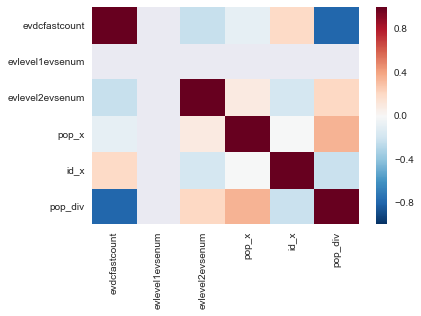

In [60]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df_ev_fast.corr())
sns.set(font_scale = 1.5)

##### create categories

In [61]:
fast_x = df_ev_fast.drop(['evdcfastcount'], axis=1)

In [85]:
fast_y = df_ev_fast.evdcfastcount

#### ran multiple scatter plot tests on individual x features

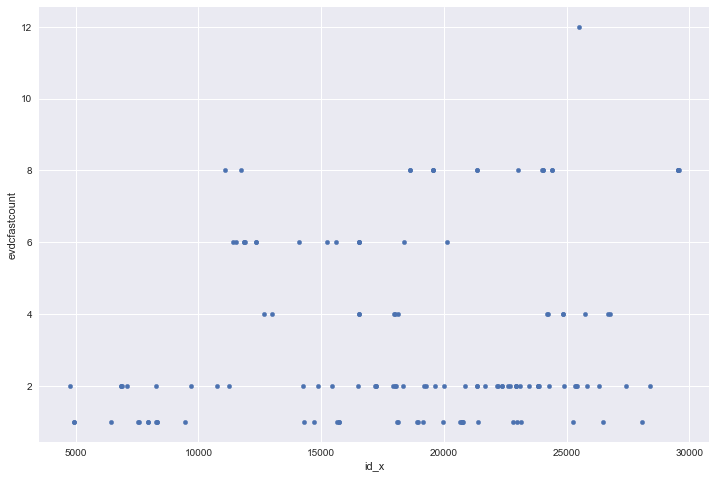

In [62]:
sns.set(font_scale = 1)
df_ev_fast.plot(kind='scatter', x='id_x', y='evdcfastcount', figsize=(12, 8))

#### 2. 110 dataframe

In [64]:
df_ev2 = df_ev_final[df_ev_final.evlevel1evsenum != 0]

In [65]:
df_ev2[('pop_x')] = df_ev2[('pop_x')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_ev2['pop_div'] = df_ev2.pop_x / df_ev2.evlevel1evsenum

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_ev2[('pop_div')] = df_ev2[('pop_div')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_ev_110 = df_ev2.drop(['citystate', 'pop', 'id', 'ev_total'], axis=1)

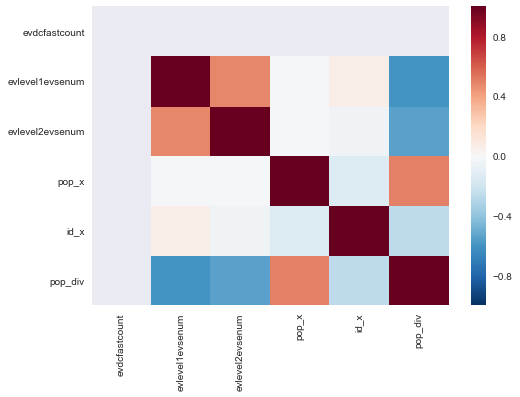

In [69]:
sns.heatmap(df_ev_110.corr())
sns.set(font_scale = 1.5)

In [70]:
x_110 = df_ev_110.drop(['evlevel1evsenum'], axis=1)

In [71]:
y_110 = df_ev_110.evlevel1evsenum

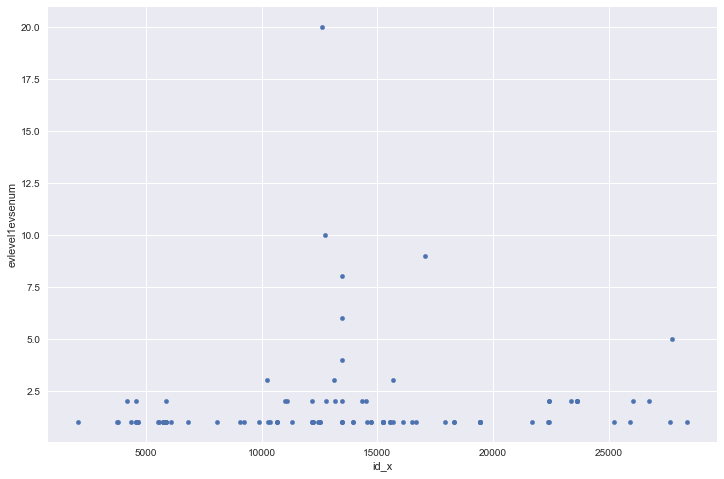

In [72]:
sns.set(font_scale = 1)
df_ev_110.plot(kind='scatter', x='id_x', y='evlevel1evsenum', figsize=(12, 8))

#### 3. 220 dataframe

In [73]:
df_ev3 = df_ev_final[df_ev_final.evlevel2evsenum != 0]

In [74]:
df_ev3[('pop_x')] = df_ev3[('pop_x')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_ev3['pop_div'] = df_ev3.pop_x / df_ev3.evlevel2evsenum

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_ev3[('pop_div')] = df_ev3[('pop_div')].astype(int)

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_ev_220 = df_ev3.drop(['citystate', 'pop', 'id', 'ev_total'], axis=1)

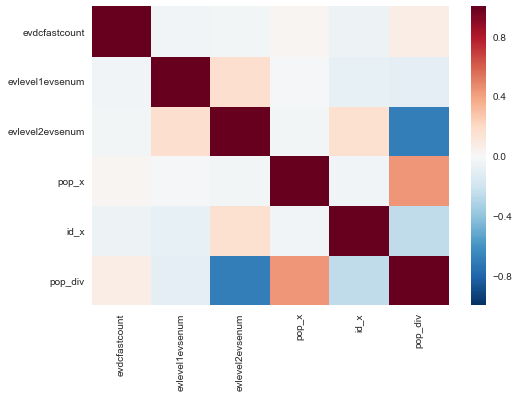

In [78]:
sns.heatmap(df_ev_220.corr())
sns.set(font_scale = 1.5)

In [79]:
x_220 = df_ev_220.drop(['evlevel2evsenum'], axis=1)

In [80]:
y_220 = df_ev_220.evlevel2evsenum

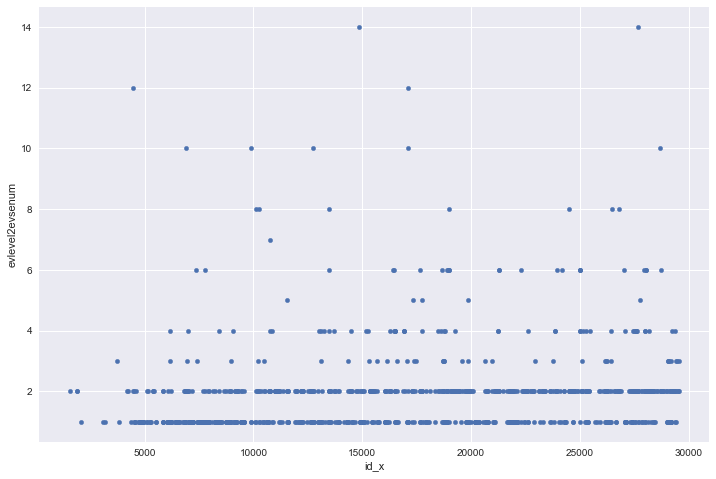

In [81]:
sns.set(font_scale = 1)
df_ev_220.plot(kind='scatter', x='id_x', y='evlevel2evsenum', figsize=(12, 8))

#### Model Prep

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model, metrics
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold

C:\Users\cmagann\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Fast Charger Model Build

Notes: 

In [86]:
# instantiate, fit
lr = LinearRegression()
lr.fit(fast_x, fast_y)

# print coefficients
zip(fast_x, lr.coef_)

[('evlevel1evsenum', 0.0),
 ('evlevel2evsenum', -0.12769546612118335),
 ('pop_x', 0.00026391300865217181),
 ('id_x', 4.9267316909418322e-07),
 ('pop_div', -0.00059109237692997864)]

In [87]:
# calculate the R-squared
lr.score(fast_x, fast_y)

0.67178244245206686

In [88]:
lr.predict(fast_x)

array([ 3.52936832,  5.23360452,  3.57169682,  0.48186215,  3.24712532,
        5.4403981 ,  5.67223507,  5.37426523,  3.38476602,  6.59023735,
        3.42980705,  3.22665053,  3.23975109,  3.5768233 ,  5.22719118,
       -0.88170458, -1.00815654,  3.50825268,  5.47795174,  0.81768944,
        5.80484314,  4.68818097,  3.421448  ,  5.80352773,  3.53680296,
        3.48734968,  5.00058271,  1.07118694,  5.05879339,  1.35488011,
        4.9603946 ,  0.50871646,  0.38141365,  3.31996117,  0.5922082 ,
       -0.88434533,  5.90770044,  3.31859215,  3.48643507,  6.11848089,
        3.5707803 ,  3.29497757,  3.43520709,  3.36170053,  2.98440797,
        0.25685974,  0.80969736,  3.43566646,  6.1164833 ,  3.30299505,
        3.43358793,  5.46555159,  5.10131001,  6.23605565,  3.28979165,
        1.16893636,  3.51824958, -0.16646616,  3.43273671,  5.81922857,
        3.52549012, -0.72198   ,  5.84550414,  0.9404447 ,  6.34039777,
        3.52930928,  0.02239024, -0.46591728,  0.83521981,  5.47

In [89]:
lr.predict(fast_x).mean()

3.3188405797101446

In [90]:
# Training setup, with random state
training_data,holdout = train_test_split(df_ev_fast,test_size=0.5,random_state=123)

In [116]:
# KFold setup (ran folds at 5, switched to 3, then 2 for smaller dataset and received improved results)
n_fast = training_data.shape[0]
kf_fast = KFold(fast_x.shape[0],n_folds=2,random_state=1)

In [117]:
### DEFINE X AND Y

MAE_score = []
MSE_score = []
R2_scores = []
RMSE_score = []

# Use K-Folds cross validation to train your model / kfolds loop (define scores in the loop)
# Fill-in the kfolds-loop:
# use iloc with scikit

for train_index, test_index in kf_fast:
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = fast_x.iloc[train_index], fast_x.iloc[test_index]
    y_train, y_true = fast_y.iloc[train_index], fast_y.iloc[test_index] 
    
    # Fit your model on your training x and training y
    lr.fit(x_train,y_train)
    y_preds = lr.predict(x_test)
    
    fold_score_fast1 = mean_squared_error(y_true,y_preds)
    MSE_score.append(fold_score_fast1)
    
    fold_score_fast2 = mean_absolute_error(y_true,y_preds)
    MAE_score.append(fold_score_fast2)
    
    fold_score_fast3 = r2_score(y_true,y_preds)
    R2_scores.append(fold_score_fast3)
    
    fold_score_fast4 = sqrt(mean_squared_error(y_true,y_preds))
    RMSE_score.append(fold_score_fast4)


In [118]:
zip(fast_x, lr.coef_)

[('evlevel1evsenum', 0.0),
 ('evlevel2evsenum', -0.45660334647158113),
 ('pop_x', 0.00032756230781667167),
 ('id_x', -3.2613021144044492e-06),
 ('pop_div', -0.00056925130812441281)]

In [119]:
lr.predict(x_test)

array([ 5.3035604 ,  4.99276055,  4.64972776,  5.11864643, -2.05161973,
        5.87396014,  5.12553936,  3.12251368,  4.74230444,  6.33360875,
        0.48477172,  0.92053534,  3.47117541,  5.09572721,  0.16211418,
        3.42280779,  3.66611672,  3.38496175,  0.12561473,  3.68724409,
        5.01598541,  0.13802601,  2.98554351, -0.34102645,  0.27179302,
        5.60723755,  1.07764034,  5.0368791 ,  3.41942469,  3.47129883,
        5.2281361 ,  4.53416911,  0.55286155,  4.58948266,  3.65150166,
        3.13459749,  5.90366458,  3.58860948,  3.58858665,  4.48695283,
        0.10163603,  3.62663156,  3.10650652,  2.62500365,  5.16524677,
        3.59605993, -0.78720515,  6.42930863,  5.23222912, -0.54961718,
        5.82489822,  0.29572195,  6.29258782,  3.54514106,  5.05220593,
        4.9712497 ,  3.02318283, -0.60456627,  3.51677288,  5.87872352,
       -2.81285278,  3.60874097,  4.54888441,  0.18526184,  3.61550067,
        6.16348046,  3.69684342,  4.9648449 ,  1.24780235])

In [120]:
lr.predict(x_test).mean()

3.2628066460378951

In [121]:
y_preds.mean()

3.2628066460378951

In [122]:
y_true.mean()

3.463768115942029

In [123]:
# mean squared error
MSE_score

[2.0226425285955671, 2.9158827344069844]

In [124]:
# mean absolute error
MAE_score

[1.2689203120140446, 1.379395674328052]

In [125]:
# root squared mean error
RMSE_score

[1.4221963748356157, 1.7075956003711723]

In [126]:
# root squared
R2_scores

[0.67983904918400495, 0.57478198669101777]

In [127]:
# normalize view
lr.intercept_

3.1453888757114772

In [128]:
list(lr.predict(x_test)[0:5]) 

[5.3035603992406539,
 4.9927605538039934,
 4.6497277603609541,
 5.1186464263261868,
 -2.0516197250947803]

In [ ]:
# Holdout Testing

In [129]:
# Training setup
training_data = holdout

In [130]:
holdout.head()

,evdcfastcount,evlevel1evsenum,evlevel2evsenum,pop_x,id_x,pop_div
12420,1,0,1,8710,9448,8710
10977,8,0,0,7599,24018,949
13787,2,0,1,11005,8276,5502
16598,1,0,0,7596,18924,7596
523,2,0,1,13748,6837,6874


In [131]:
holdout.dtypes

evdcfastcount      int32
evlevel1evsenum    int32
evlevel2evsenum    int32
pop_x              int32
id_x               int32
pop_div            int32
dtype: object

In [132]:
# Error on fast_x set > Must pass DataFrame with boolean values only
fast_x = holdout[fast_x]
fast_y = holdout[fast_y]

ValueError: Must pass DataFrame with boolean values only

In [133]:
holdout[fast_x].head()

ValueError: Must pass DataFrame with boolean values only

In [134]:
lr.predict(fast_x).mean()

3.2183598447580777

#### grid search

In [135]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error')

gs.fit(fast_x, fast_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [136]:
# new population divide feature reduced score to -16 from -18
print(gs.best_score_)

-2.23730032642


In [137]:
print(-gs.best_score_)

2.23730032642


In [138]:
print(gs.best_estimator_)

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [139]:
print(gs.grid_scores_)

[mean: -2.26607, std: 0.25343, params: {'alpha': 1e-10}, mean: -2.26607, std: 0.25343, params: {'alpha': 1.0000000000000001e-09}, mean: -2.26607, std: 0.25343, params: {'alpha': 1e-08}, mean: -2.26607, std: 0.25343, params: {'alpha': 9.9999999999999995e-08}, mean: -2.26607, std: 0.25343, params: {'alpha': 9.9999999999999995e-07}, mean: -2.26607, std: 0.25343, params: {'alpha': 1.0000000000000001e-05}, mean: -2.26607, std: 0.25343, params: {'alpha': 0.0001}, mean: -2.26607, std: 0.25342, params: {'alpha': 0.001}, mean: -2.26605, std: 0.25340, params: {'alpha': 0.01}, mean: -2.26588, std: 0.25314, params: {'alpha': 0.10000000000000001}, mean: -2.26416, std: 0.25068, params: {'alpha': 1.0}, mean: -2.25184, std: 0.23300, params: {'alpha': 10.0}, mean: -2.23730, std: 0.20976, params: {'alpha': 100.0}, mean: -2.25038, std: 0.21986, params: {'alpha': 1000.0}, mean: -2.25458, std: 0.22233, params: {'alpha': 10000.0}, mean: -2.25507, std: 0.22262, params: {'alpha': 100000.0}, mean: -2.25497, st

In [140]:
lm = linear_model.LinearRegression().fit(fast_x, fast_y)
print("~~~ OLS ~~~")
print('OLS MSE: ', metrics.mean_squared_error(fast_y, lm.predict(fast_x)))
print('OLS R2:', lm.score(fast_x, fast_y))

lm = linear_model.Lasso().fit(fast_x, fast_y)
print("~~~ Lasso ~~~")
print('Lasso MSE: ', metrics.mean_squared_error(fast_y, lm.predict(fast_x)))
print('Lasso R2:', lm.score(fast_x, fast_y))

lm = linear_model.Ridge().fit(fast_x, fast_y)
print("~~~ Ridge ~~~")
print('Ridge MSE: ', metrics.mean_squared_error(fast_y, lm.predict(fast_x)))
print('Ridge R2:', lm.score(fast_x, fast_y))

~~~ OLS ~~~
('OLS MSE: ', 2.169021006748713)
('OLS R2:', 0.67178244245206686)
~~~ Lasso ~~~
('Lasso MSE: ', 2.1970321710215837)
('Lasso R2:', 0.66754377630125039)
~~~ Ridge ~~~
('Ridge MSE: ', 2.1690215010172782)
('Ridge R2:', 0.67178236765905153)


#### 110 Charger Model Build (simple model run through only for initial score, very low number of instances for 110s overall)

Notes: 

In [143]:
# create X and y
X_110 = x_110
y_110 = y_110

# instantiate, fit
lr = LinearRegression()
lr.fit(X_110, y_110)

# print coefficients
zip(X_110, lr.coef_)

[('evdcfastcount', 0.0),
 ('evlevel2evsenum', 0.12498787300422297),
 ('pop_x', 0.00037066852501538452),
 ('id_x', -2.7725964120500689e-05),
 ('pop_div', -0.0004881437213536679)]

In [144]:
lr.score(X_110, y_110)

0.46835439938526774

In [145]:
lr.predict(fast_x)

array([ 2.89734966,  4.51865879,  2.9348188 ,  0.75929227,  4.0370696 ,
        5.16083387,  4.86978923,  4.35758838,  3.49991002,  6.20153113,
        3.33113086,  3.59062008,  3.20157704,  2.70385395,  5.67786675,
        0.17177029,  0.22677783,  2.82230717,  4.76925516,  1.02011231,
        5.00804463,  4.12924898,  3.40468339,  4.77231446,  2.84936203,
        3.19500164,  4.22072244,  1.31872899,  4.22165799,  0.69763888,
        4.31460998,  0.62058663,  0.72347691,  3.74672253,  0.61004976,
        0.44875079,  5.56386538,  3.46658647,  3.14725642,  5.28516147,
        3.05385554,  3.010589  ,  3.23228271,  3.63345566,  3.68236194,
        0.78284913,  0.87691923,  3.24942523,  5.28241061,  3.59160466,
        3.30356039,  4.93680532,  4.18990978,  5.47717435,  3.39077572,
        1.00612881,  2.83716635,  0.29749217,  3.2674703 ,  4.94507916,
        2.89601162,  0.20713265,  5.52430158,  0.89519223,  5.95850491,
        2.89405759,  0.36111646,  0.86035533,  0.88594367,  4.39

In [146]:
lr.predict(fast_x).mean()

3.1702304035754412

#### 220 Charger Model Build (simple model run through only for initial score)

Notes: 

In [147]:
# create X and y
X_220 = x_220
y_220 = y_220

# instantiate, fit
lr = LinearRegression()
lr.fit(X_220, y_220)

# print coefficients
zip(X_220, lr.coef_)

[('evdcfastcount', 0.14114962036200329),
 ('evlevel1evsenum', 0.21141881652206695),
 ('pop_x', 0.00024288249128639553),
 ('id_x', -7.3422821299601769e-06),
 ('pop_div', -0.0003445942573982346)]

In [148]:
lr.score(X_220, y_220)

0.58064973294362465

In [149]:
lr.predict(fast_x)

array([ 2.4863024 ,  3.5135144 ,  2.44248355,  1.06906033,  3.13862183,
        4.01767121,  3.82234684,  3.50162168,  2.81523318,  4.74237568,
        2.71702586,  3.05671059,  2.96545926,  2.37954495,  4.54678894,
        0.41363151,  0.60651841,  2.49474418,  3.6776266 ,  1.21113261,
        3.94030028,  3.43664985,  2.74539828,  3.87461357,  2.46529295,
        2.6114511 ,  3.42470859,  1.34570463,  3.31993315,  1.03446924,
        3.42041196,  0.83233388,  1.0379009 ,  2.97686112,  0.84740596,
        0.69269418,  4.23246723,  2.91068165,  2.60103103,  4.20565808,
        2.47200865,  2.84950778,  2.68625377,  2.8967604 ,  3.44467161,
        1.23236725,  1.17095349,  2.68982981,  4.20362358,  2.96017275,
        2.70557398,  3.77712597,  3.33829933,  4.32936521,  2.92862984,
        1.28269175,  2.48622328,  0.60076741,  2.69838509,  3.93167399,
        2.49135539,  0.45737943,  4.18179262,  0.9986727 ,  4.52483129,
        2.48557885,  0.65835376,  0.89298265,  1.1788503 ,  3.57

In [150]:
lr.predict(fast_x).mean()

2.668262429503685